# 1 First exploratory analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Setup seaborn plots with figure size 
# sns.set()
plt.rcParams['figure.figsize'] = 20, 15
dic = {"size": 14}
matplotlib.rc('font', **dic)

In [18]:
df = pd.read_csv("data/general_data.csv", index_col="EmployeeID")
df.drop(['EmployeeCount','StandardHours'],axis=1, inplace = True)
df.shape

(4410, 21)

## 1.1 Filtering columns

In [13]:
num_cols = list(df.dtypes[df.dtypes != 'object'].index.values) + ["Attrition"]
cat_cols = list(df.dtypes[df.dtypes == 'object'].index.values)

## 1.2 Target columns into int

In [19]:
df_numeric = df.loc[:, num_cols]
df_numeric['Attrition'] = df_numeric['Attrition'].astype('category')
df_numeric['Attrition_num'] = df_numeric.Attrition.cat.codes
df_numeric

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Attrition_num
EmployeeID,,,,,,,,,,,,,,,
1,51,6,2,1,131160,1.0,11,0,1.0,6,1,0,0,No,0
2,31,10,1,1,41890,0.0,23,1,6.0,3,5,1,4,Yes,1
3,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3,No,0
4,38,2,5,3,83210,3.0,11,3,13.0,5,8,7,5,No,0
5,32,10,1,1,23420,4.0,12,2,9.0,2,6,0,4,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,42,5,4,1,60290,3.0,17,1,10.0,5,3,0,2,No,0
4407,29,2,4,1,26790,2.0,15,0,10.0,2,3,0,2,No,0
4408,25,25,2,2,37020,0.0,20,0,5.0,4,4,1,2,No,0


## 1.3 removing nan rows

In [5]:
df_numeric = df_numeric.loc[df_numeric.notna().all(axis=1), :]
df_numeric.shape

(4382, 15)

## 1.4 Correlations with the target value

In [6]:
df_numeric.corr()['Attrition_num'].sort_values()

TotalWorkingYears         -0.169670
Age                       -0.158399
YearsWithCurrManager      -0.154692
YearsAtCompany            -0.133003
TrainingTimesLastYear     -0.047586
YearsSinceLastPromotion   -0.031423
MonthlyIncome             -0.030160
Education                 -0.017106
JobLevel                  -0.012382
DistanceFromHome          -0.009449
StockOptionLevel          -0.008164
PercentSalaryHike          0.033153
NumCompaniesWorked         0.042831
Attrition_num              1.000000
Name: Attrition_num, dtype: float64

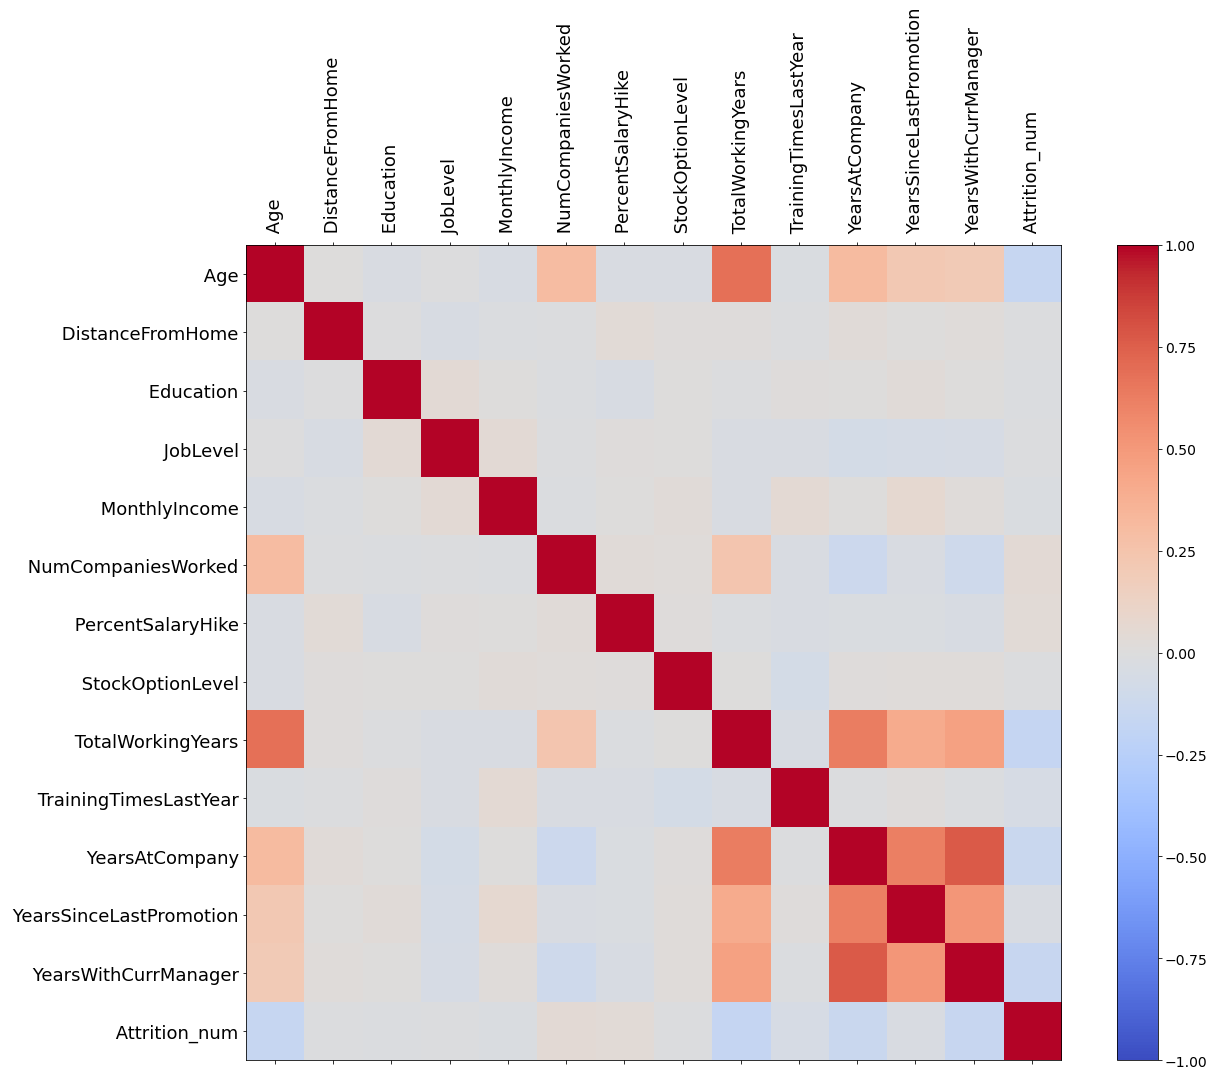

In [7]:
# Now we plot correlation of attributes
x = df_numeric
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)

plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

## 1.5 Data distribution

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title={'center':'Attrition_num'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

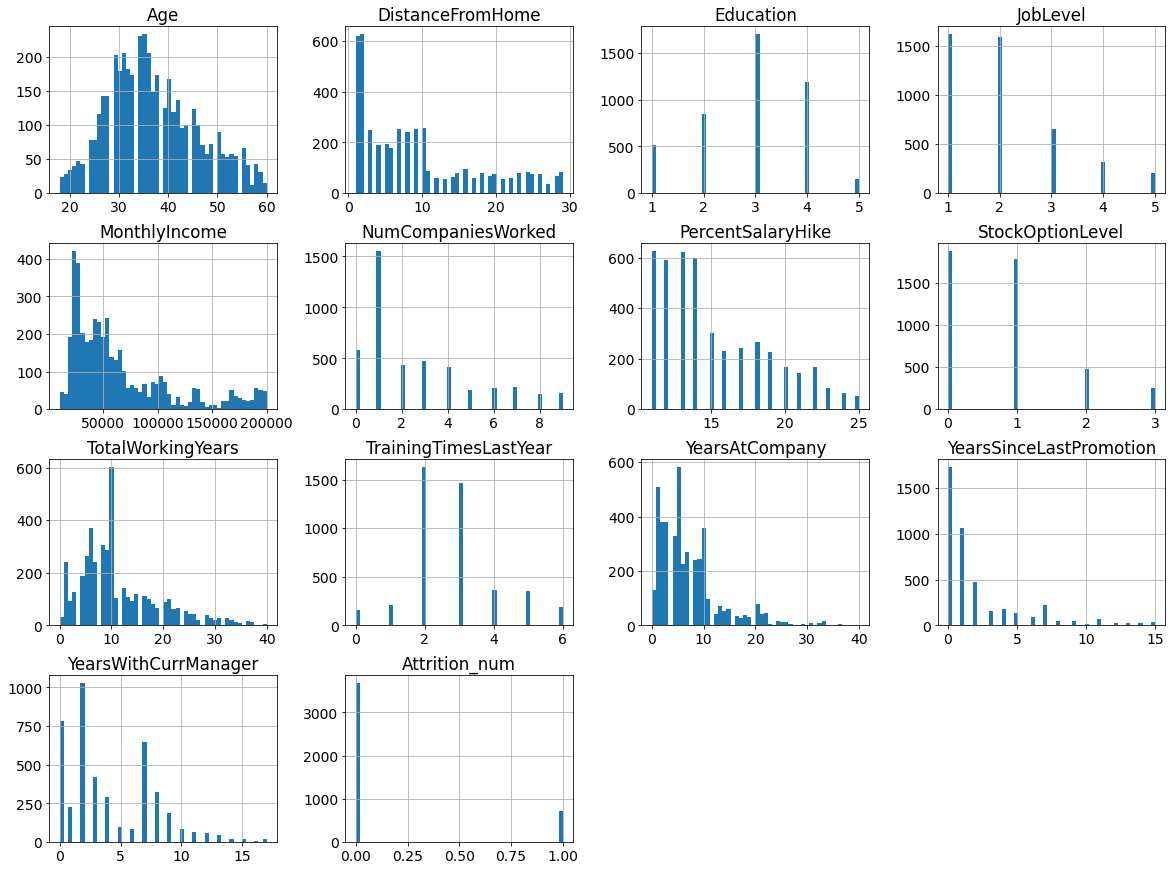

In [8]:
df_numeric.hist(bins=50)

## 1.6 Pairplots

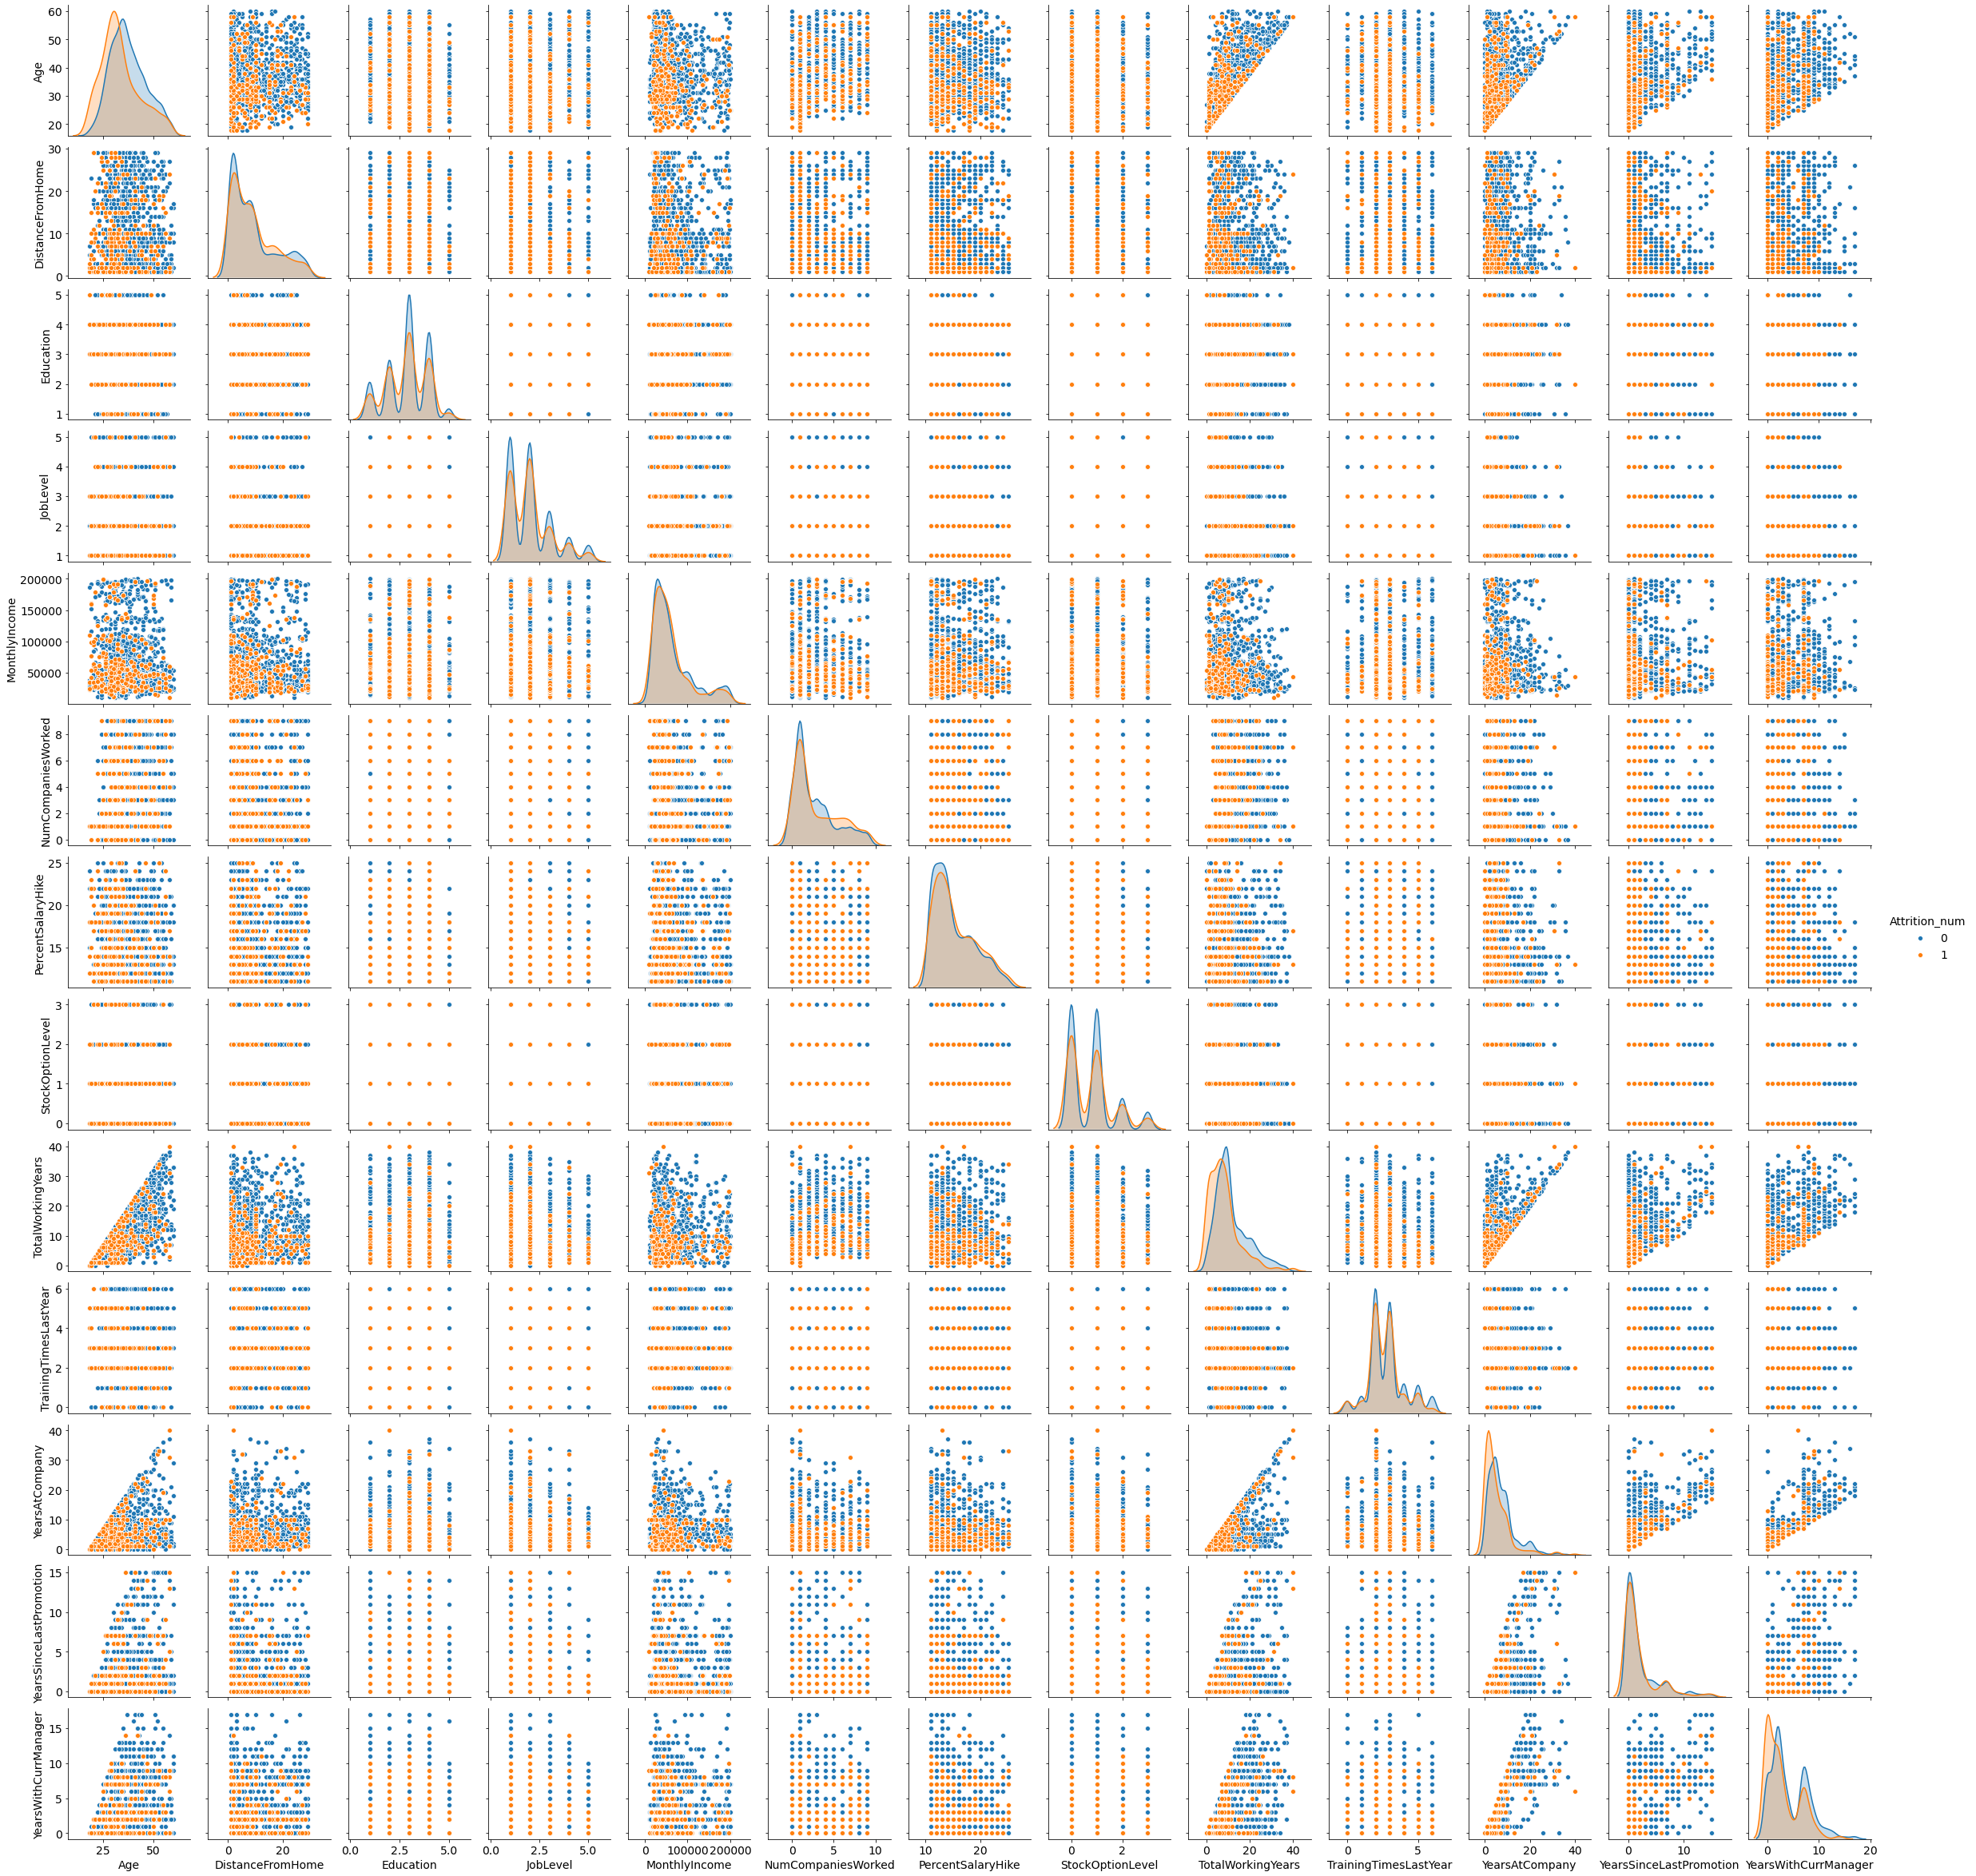

In [9]:
sns.pairplot(df_numeric, hue='Attrition_num')

In [22]:
df_numeric.drop(['Attrition'], axis=1)
df_numeric.to_csv("processed_data/numerical.csv")